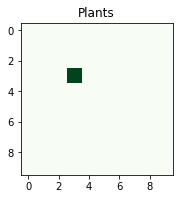

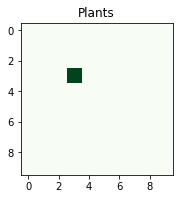

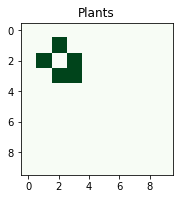

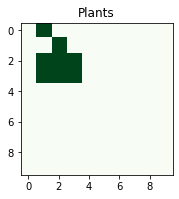

In [4]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar
import simulation.gas_drift as gd
import simulation.plant_simulation as ps

world_params = { 'world_size': 10,
                 'global_creature_id_counter': int(1) }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)
world_params['carbon_dioxide_map'][0][0] = 0

sc.spawn_new_plants(world_params=world_params,
                             num_plants=1)

creature_render.place_creatures(world_params)

for i in range(200):
    ps.photosynthesize(world_params)
    gd.move_gases(world_params)
    ps.grow_plants(world_params)
    creature_render.place_creatures(world_params)


    if i % 50 == 0:
        ar.render_array(world_params['world_array'], 'Plants')
        ar.render_array(world_params['carbon_dioxide_map'], 'Carbon Dioxide')